In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
cd  /Users/bhanusree/Documents/introds


C:\Users\bhanusree\Documents\introds


# Task 1 – Problem Formulation, Data Acquisition and Preparation

In [3]:
# loading the dataset
trip = pd.read_csv("trip1.csv")
pd.read_csv("trip1.csv")

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,4.0,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,0.0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Asia,3.0,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,5.0,May,Tuesday


In [4]:
#finding sum of all null values
#fount null values in no of rooms,user continent,member years, review month and review weekday
trip.isnull().sum()


User_country           0
No_of_reviews          0
No_of_hotelreviews     0
Helpful_votes          0
Score                  0
Period_of_stay         0
Traveler_type          0
Pool                   0
Gym                    0
Tennis_court           0
Spa                    0
Casino                 0
Free_internet          0
Hotel_name             0
hotelstar              0
No_of_rooms           96
User_continent        96
Member_years          96
Review_month          96
Review_weekday        96
dtype: int64

In [5]:
#dropped all the null values
trip = trip.dropna()

In [6]:
#now it is checked all the null values are removed
trip.isnull().sum()

User_country          0
No_of_reviews         0
No_of_hotelreviews    0
Helpful_votes         0
Score                 0
Period_of_stay        0
Traveler_type         0
Pool                  0
Gym                   0
Tennis_court          0
Spa                   0
Casino                0
Free_internet         0
Hotel_name            0
hotelstar             0
No_of_rooms           0
User_continent        0
Member_years          0
Review_month          0
Review_weekday        0
dtype: int64

In [7]:
#checking whether all are their in respective data types
trip.dtypes


User_country           object
No_of_reviews           int64
No_of_hotelreviews      int64
Helpful_votes           int64
Score                   int64
Period_of_stay         object
Traveler_type          object
Pool                   object
Gym                    object
Tennis_court           object
Spa                    object
Casino                 object
Free_internet          object
Hotel_name             object
hotelstar               int64
No_of_rooms           float64
User_continent         object
Member_years          float64
Review_month           object
Review_weekday         object
dtype: object

In [8]:
# for convience changed member years into integer
trip[['Member_years']] = trip[['Member_years']].astype('int64') 

In [9]:
# as this column comes into categorical it is changed into object
trip[['hotelstar']] = trip[['hotelstar']].astype('object') 

In [10]:
# for convience changed no of rooms into integer
trip[['No_of_rooms']] = trip[['No_of_rooms']].astype('int64') 

In [11]:
trip.iloc[:, 18].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [12]:
trip.iloc[:, 19].unique()

array(['Thursday', 'Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday',
       'Monday'], dtype=object)

In [13]:
#descriptive statistics of all numerical columns
trip.describe()

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,No_of_rooms,Member_years
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,43.848039,14.764706,29.767157,4.083333,2540.529412,-0.068627
std,72.075080,23.086283,46.142629,1.019667,1177.605288,89.674624
min,1.000000,0.000000,0.000000,1.000000,315.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,1467.000000,2.000000
50%,22.000000,9.000000,16.000000,4.000000,2916.000000,4.000000
75%,47.250000,17.000000,31.000000,5.000000,3348.000000,7.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [14]:
#descriptive statistics of all object columns
trip.describe(include=np.object)

,User_country,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,User_continent,Review_month,Review_weekday
count,408,408,408,408,408,408,408,408,408,408,408,408,408,408
unique,43,4,5,2,1,2,2,2,2,17,3,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Trump International Hotel Las Vegas,5,North America,July,Sunday
freq,172,104,179,384,408,312,360,384,384,24,192,232,34,64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE04208>,
      dtype=object)

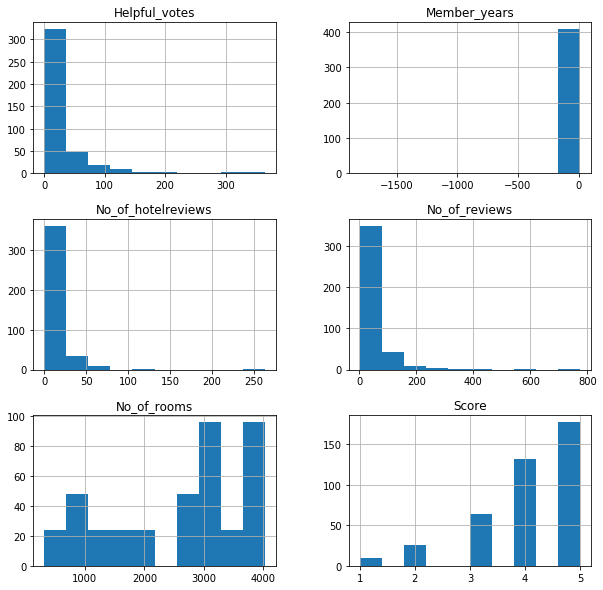

In [15]:
#histogram for all numerical data to understand the dataset
trip.hist(column=["No_of_reviews", "No_of_hotelreviews", "Helpful_votes", "Score", "No_of_rooms", "Member_years"], figsize = (10,10))

In [16]:
trip.to_csv("new.csv", index = False)


In [17]:
las = pd.read_csv("new.csv")

### Feature Importance 

In [18]:
# selected and defined the categorical columns 
categorical = list(trip.select_dtypes(include=['object']).columns.values)
categorical

['User_country',
 'Period_of_stay',
 'Traveler_type',
 'Pool',
 'Gym',
 'Tennis_court',
 'Spa',
 'Casino',
 'Free_internet',
 'Hotel_name',
 'hotelstar',
 'User_continent',
 'Review_month',
 'Review_weekday']

In [19]:
# transformed all the categorical columns in to numbers 
le = preprocessing.LabelEncoder()
for i in range(0, len(categorical)):
    trip[categorical[i]] = le.fit_transform(trip[categorical[i]])
trip.head()

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,41,11,4,13,5,0,3,0,0,0,0,1,1,2,0,3773,3,9,4,4
1,41,119,21,75,3,0,0,0,0,0,0,1,1,2,0,3773,3,3,4,0
2,41,36,9,25,5,2,2,0,0,0,0,1,1,2,0,3773,3,2,3,2
3,40,14,7,14,4,2,3,0,0,0,0,1,1,2,0,3773,2,6,3,0
4,3,5,5,2,4,2,4,0,0,0,0,1,1,2,0,3773,3,7,7,5


In [20]:
## remove score label from data
#preparing train and test labels
X= trip.drop(['Score'], axis=1) ## remove score label from data
y = trip['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#applying random forest feature to class and finding the most contributed features of score
#Recurcise feature elimination

rfe = RFE(estimator = Ridge(), n_features_to_select = 10)
rfe.fit(X_train, y_train)
feature_list = pd.DataFrame({'col':list(X_train.columns.values),'sel':list(rfe.support_ *1)})
print("*Most contributing features in Score*")
print()
print(feature_list[feature_list.sel==1].col.values)

*Most contributing features in Score*
()
['Period_of_stay' 'Traveler_type' 'Pool' 'Tennis_court' 'Spa' 'Casino'
 'Free_internet' 'hotelstar' 'User_continent' 'Review_weekday']


# Task 2 – Data Exploration

In [22]:
#descriptive statistics for numerical data
las.describe( ).T

,count,mean,std,min,25%,50%,75%,max
No_of_reviews,408.0,43.848039,72.075080,1.0,12.0,22.0,47.25,775.0
No_of_hotelreviews,408.0,14.764706,23.086283,0.0,5.0,9.0,17.00,263.0
Helpful_votes,408.0,29.767157,46.142629,0.0,8.0,16.0,31.00,365.0
Score,408.0,4.083333,1.019667,1.0,4.0,4.0,5.00,5.0
hotelstar,408.0,4.235294,0.807538,3.0,4.0,4.0,5.00,5.0
No_of_rooms,408.0,2540.529412,1177.605288,315.0,1467.0,2916.0,3348.00,4027.0
Member_years,408.0,-0.068627,89.674624,-1806.0,2.0,4.0,7.00,13.0


In [23]:
las['Period_of_stay'].value_counts()

Mar-May    104
Sep-Nov    102
Jun-Aug    102
Dec-Feb    100
Name: Period_of_stay, dtype: int64

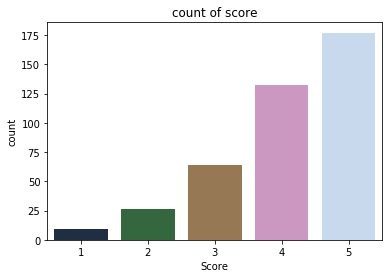

In [24]:
ax = sns.countplot(x="Score", data=las, palette="cubehelix" ).set_title('count of score')


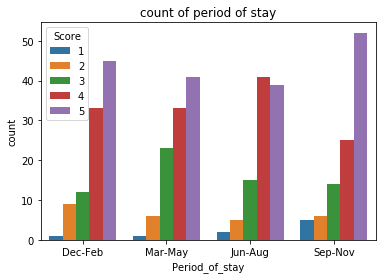

In [25]:
 ax = sns.countplot(x="Period_of_stay", hue= "Score", data=las).set_title('count of period of stay')


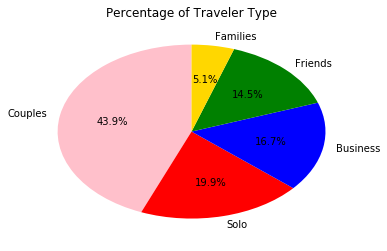

In [26]:
labels =  ['Couples', 'Solo', 'Business', 'Friends', 'Families']
colors = ['pink', 'red', 'blue', 'green', 'gold']
plt.pie(las.Traveler_type.value_counts(), labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.title("Percentage of Traveler Type")
plt.show()

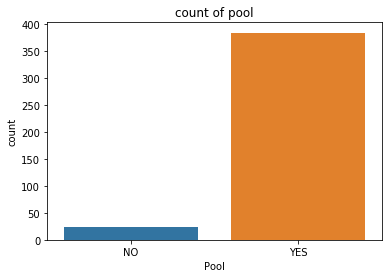

In [27]:
 ax = sns.countplot(x="Pool", data=las).set_title('count of pool')

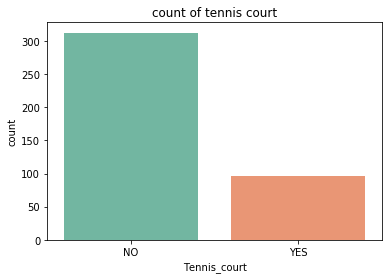

In [28]:
 ax = sns.countplot(x="Tennis_court", data=las, palette="Set2").set_title("count of tennis court")

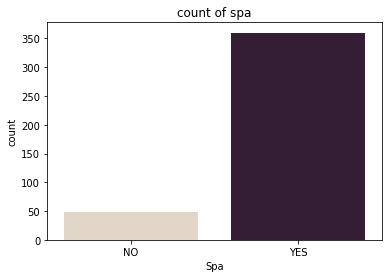

In [29]:
  ax = sns.countplot(x="Spa", data=las, palette="ch:.25").set_title("count of spa")

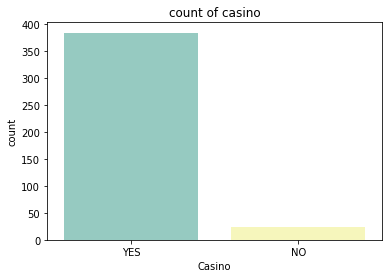

In [30]:
 ax = sns.countplot(x="Casino", data=las, palette="Set3" ).set_title("count of casino")

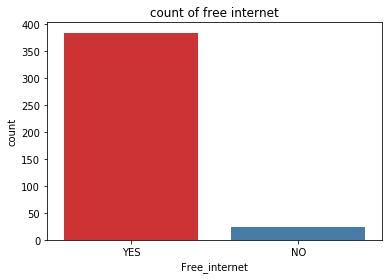

In [31]:
 ax = sns.countplot(x="Free_internet", data=las, palette="Set1" ).set_title("count of free internet")

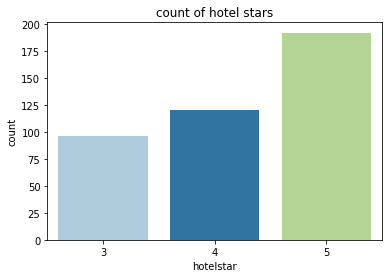

In [32]:
 ax = sns.countplot(x="hotelstar", data=las, palette="Paired" ).set_title("count of hotel stars")

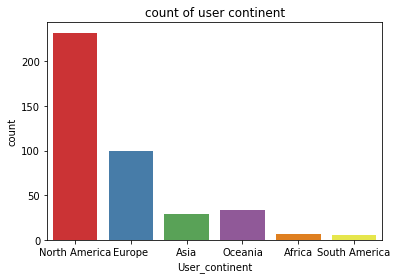

In [33]:
 ax = sns.countplot(x="User_continent", data=las, palette="Set1" ).set_title("count of user continent")

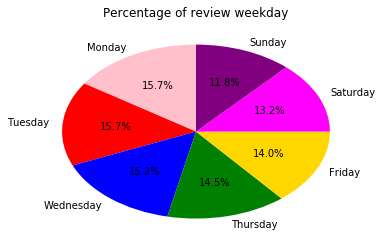

In [34]:
labels =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['pink', 'red', 'blue', 'green', 'gold', 'magenta', 'purple']
plt.pie(las.Review_weekday.value_counts(), labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.title("Percentage of review weekday")
plt.show()

In [35]:
vegas = trip[['Period_of_stay', 'Traveler_type', 'Pool', 'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'hotelstar', 'User_continent', 'Review_weekday', 'Score']]
corr = vegas.corr()
corr.style.background_gradient(cmap='magma').set_precision(2)

,Period_of_stay,Traveler_type,Pool,Tennis_court,Spa,Casino,Free_internet,hotelstar,User_continent,Review_weekday,Score
Period_of_stay,1,-0.042,-0.035,-0.0049,-0.024,0.0022,0.0022,-0.013,-0.034,-0.084,-0.0094
Traveler_type,-0.042,1,-0.11,-0.027,-0.063,0.019,0.038,-0.056,-0.058,0.00079,0.019
Pool,-0.035,-0.11,1,0.14,0.68,-0.062,-0.063,0.38,-0.047,0.031,0.21
Tennis_court,-0.0049,-0.027,0.14,1,0.2,0.14,0.14,-0.16,0.022,-0.021,0.068
Spa,-0.024,-0.063,0.68,0.2,1,0.68,-0.091,0.56,-0.087,-0.0066,0.18
Casino,0.0022,0.019,-0.062,0.14,0.68,1,-0.062,0.38,-0.072,-0.04,0.031
Free_internet,0.0022,0.038,-0.063,0.14,-0.091,-0.062,1,0.073,0.088,0.0006,0.19
hotelstar,-0.013,-0.056,0.38,-0.16,0.56,0.38,0.073,1,-0.031,-0.019,0.26
User_continent,-0.034,-0.058,-0.047,0.022,-0.087,-0.072,0.088,-0.031,1,0.022,0.1
Review_weekday,-0.084,0.00079,0.031,-0.021,-0.0066,-0.04,0.0006,-0.019,0.022,1,-0.11


In [36]:
corr = las.corr()
corr.style.background_gradient(cmap='magma').set_precision(2)

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,hotelstar,No_of_rooms,Member_years
No_of_reviews,1,0.59,0.77,-0.025,-0.029,-0.088,0.022
No_of_hotelreviews,0.59,1,0.73,0.013,-0.078,-0.09,0.022
Helpful_votes,0.77,0.73,1,0.019,-0.0056,-0.061,0.023
Score,-0.025,0.013,0.019,1,0.26,-0.05,-0.042
hotelstar,-0.029,-0.078,-0.0056,0.26,1,0.27,0.016
No_of_rooms,-0.088,-0.09,-0.061,-0.05,0.27,1,-0.016
Member_years,0.022,0.022,0.023,-0.042,0.016,-0.016,1


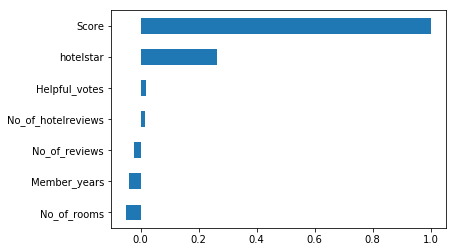

In [37]:
las.corr()['Score'].sort_values().plot(kind='barh')

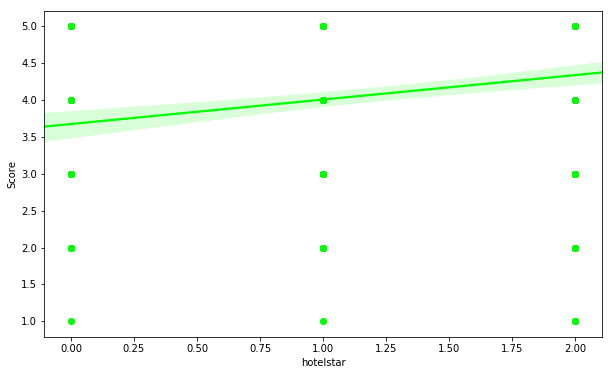

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(x="hotelstar", y="Score", data=trip, color='lime') 

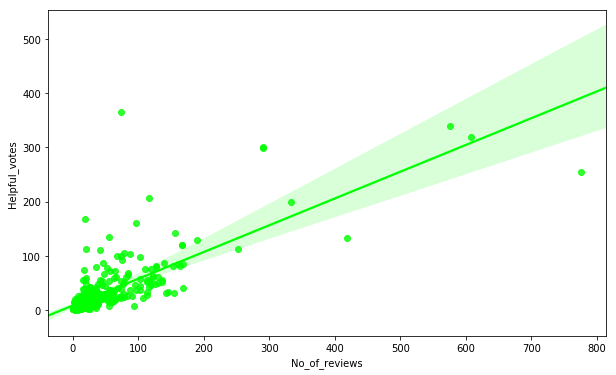

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x="No_of_reviews", y="Helpful_votes", data=trip, color='lime') 

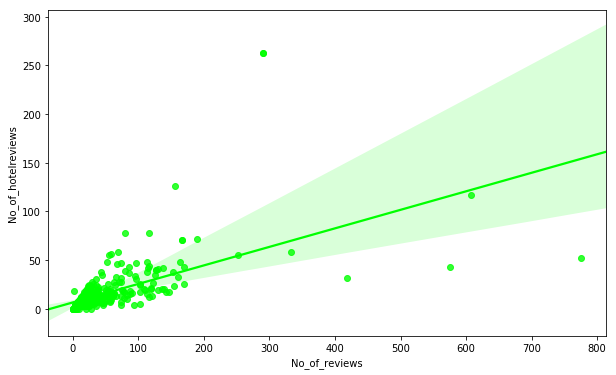

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x="No_of_reviews", y="No_of_hotelreviews", data=trip, color='lime') 

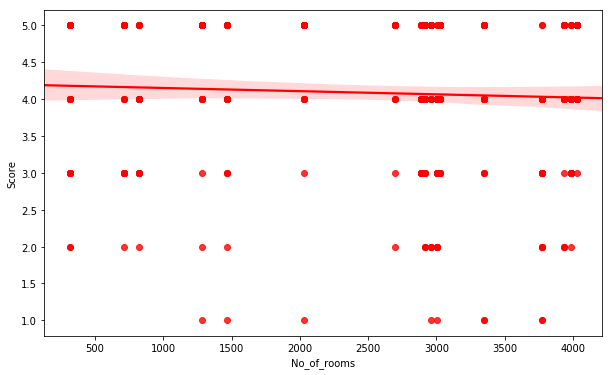

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(x="No_of_rooms", y="Score", data=trip, color='red')

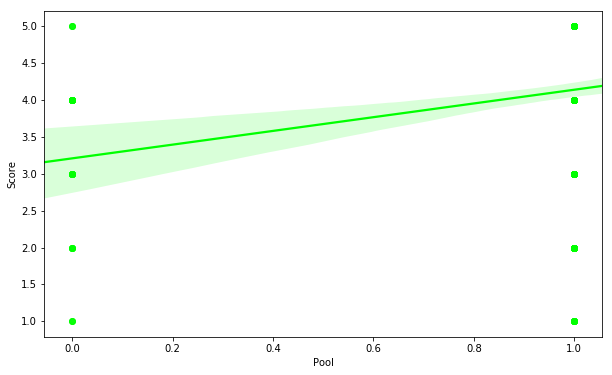

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x="Pool", y="Score", data=trip, color='lime') 

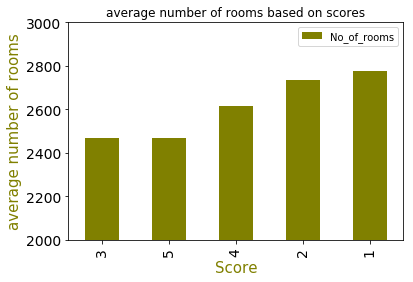

In [43]:
av = trip[['No_of_rooms','Score']]
av.groupby("Score").mean().sort_values("No_of_rooms", ascending=True).plot.bar(color='olive', title='average number of rooms based on scores', fontsize = 14)
plt.xlabel('Score', fontsize=15, color='olive')
plt.ylabel('average number of rooms', fontsize=15, color='olive')
plt.ylim(2000,3000) 
plt.show()

Text(0,0.5,'score')

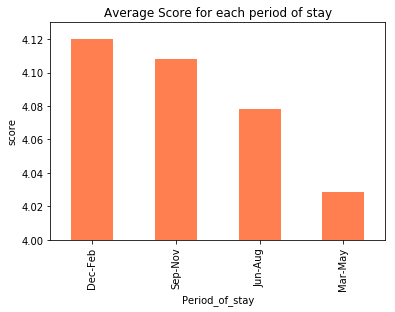

In [44]:
las.groupby("Period_of_stay").Score.mean().sort_values(ascending=False).plot.bar(title='Average Score for each period of stay', color='coral')
plt.ylim(4,4.13)
plt.ylabel("score")

Text(0,0.5,'number of rooms')

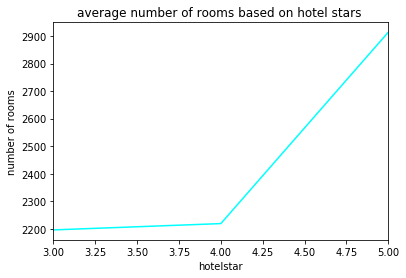

In [45]:
las.groupby("hotelstar").No_of_rooms.mean().sort_values(ascending=False).plot.line(title='average number of rooms based on hotel stars ', color='cyan')
plt.ylabel("number of rooms")

Text(0.5,0,'score')

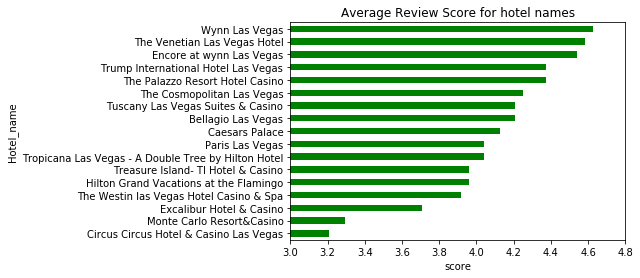

In [46]:
las.groupby("Hotel_name").Score.mean().sort_values(ascending=True).plot.barh(title='Average Review Score for hotel names', color='Green')
plt.xlim(3,4.8)
plt.xlabel("score")

(3.7, 4.4)

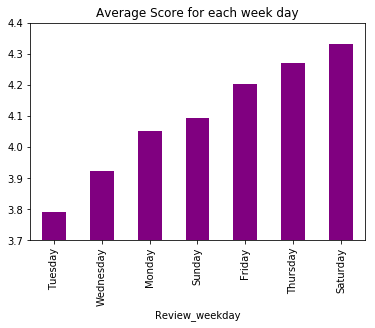

In [47]:
las.groupby("Review_weekday").Score.mean().sort_values().plot.bar(title='Average Score for each week day', color='purple')
plt.ylim(3.7,4.4)

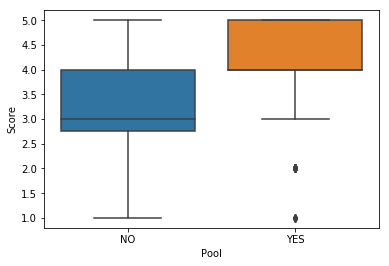

In [48]:
ax = sns.boxplot(x="Pool", y="Score", data=las)

Text(0.5,0,'average number of reviews')

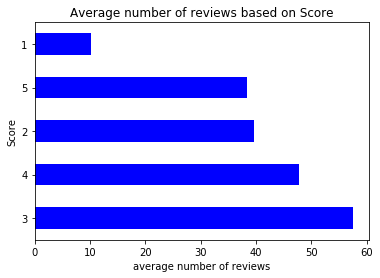

In [49]:
las.groupby("Score").No_of_reviews.mean().sort_values(ascending=False).plot.barh(title='Average number of reviews based on Score', color='blue')
plt.xlabel("average number of reviews")

# Task 3 – Data Modelling

In [50]:

x1 = trip
x1 = x1.drop(['Score'], axis = 1)
y1 = trip['Score']

# checking the shapes
print("Shape of x1:", x1.shape)
print("Shape of y1:", y1.shape)

('Shape of x1:', (408, 19))
('Shape of y1:', (408L,))


# Suite1: 50% for training and 50% for testing


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.5, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

('Shape of x_train :', (204, 19))
('Shape of y_train :', (204L,))
('Shape of x_test :', (204, 19))
('Shape of y_test :', (204L,))


### RandomForestClassifier

('Training Accuracy :', 0.9950980392156863)
('Testing Accuracy :', 0.38235294117647056)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        10
           3       0.20      0.21      0.20        29
           4       0.34      0.31      0.33        67
           5       0.53      0.55      0.54        93

   micro avg       0.38      0.38      0.38       204
   macro avg       0.22      0.21      0.21       204
weighted avg       0.38      0.38      0.38       204



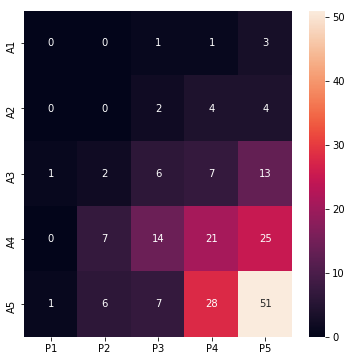

In [52]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix, annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)


### GaussianProcessClassifier

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.4411764705882353)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        10
           3       0.50      0.03      0.06        29
           4       0.43      0.04      0.08        67
           5       0.46      0.92      0.61        93

   micro avg       0.44      0.44      0.44       204
   macro avg       0.28      0.20      0.15       204
weighted avg       0.42      0.44      0.31       204



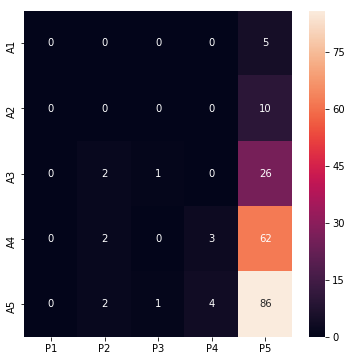

In [53]:
model =  GaussianProcessClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
gp_training_score = round(model.score(x_train, y_train)*100, 2)
gp_testing_score = round(model.score(x_test, y_test)*100, 2)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix, annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.36872506578388936)
('GP', 0.40710041592394536)
[array([0.31428571, 0.36764706, 0.42424242]), array([0.4       , 0.39705882, 0.42424242])]


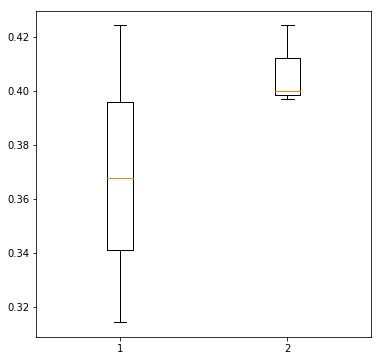

In [54]:
# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

              model  Training_accuracy  Testing_accuracy
0     Random forest              99.51             38.24
1  Gaussian process             100.00             44.12


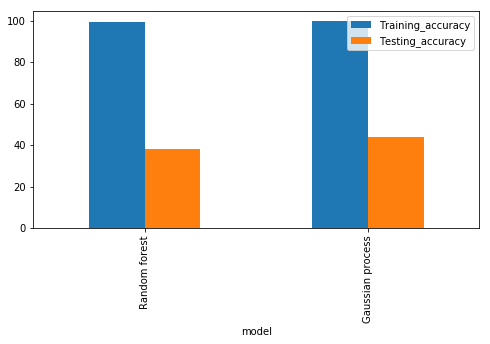

In [55]:
suit3 = { 'model': ['Random forest', 'Gaussian process'], 'Training_accuracy': [rf_training_score , gp_training_score], 'Testing_accuracy': [rf_testing_score, gp_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))

### Suite2: 60% for training and 40% for testing

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

('Shape of x_train :', (244, 19))
('Shape of y_train :', (244L,))
('Shape of x_test :', (164, 19))
('Shape of y_test :', (164L,))


### RandomForestClassifier

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.3719512195121951)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.07      0.10      0.08        10
           3       0.18      0.17      0.18        23
           4       0.34      0.36      0.35        55
           5       0.52      0.49      0.50        74

   micro avg       0.37      0.37      0.37       164
   macro avg       0.22      0.22      0.22       164
weighted avg       0.38      0.37      0.38       164



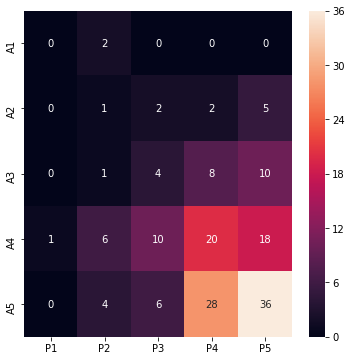

In [57]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

### GaussianProcessClassifier

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.43902439024390244)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        10
           3       0.50      0.04      0.08        23
           4       0.40      0.04      0.07        55
           5       0.45      0.93      0.61        74

   micro avg       0.44      0.44      0.44       164
   macro avg       0.27      0.20      0.15       164
weighted avg       0.41      0.44      0.31       164



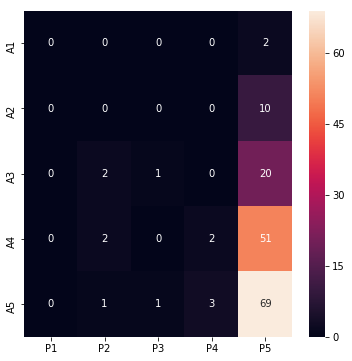

In [58]:
model =  GaussianProcessClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
gp_training_score = round(model.score(x_train, y_train)*100, 2)
gp_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.443510518756651)
('GP', 0.4140788367229999)
[array([0.4047619 , 0.43209877, 0.49367089]), array([0.4047619 , 0.41975309, 0.41772152])]


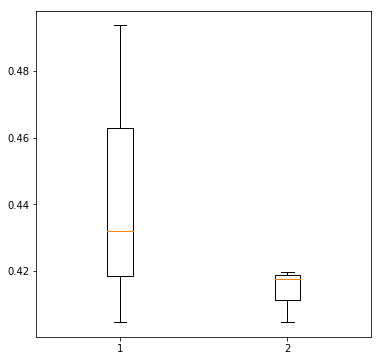

In [59]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

              model  Training_accuracy  Testing_accuracy
0     Random forest              100.0              37.2
1  Gaussian process              100.0              43.9


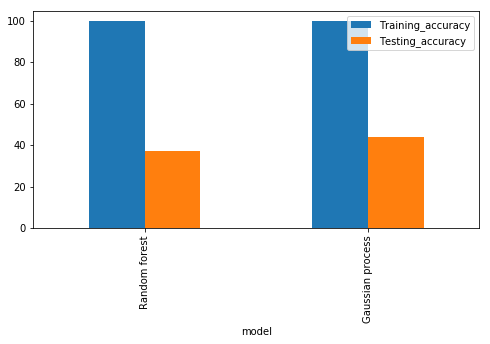

In [60]:
suit3 = { 'model': ['Random forest', 'Gaussian process'], 'Training_accuracy': [rf_training_score , gp_training_score], 'Testing_accuracy': [rf_testing_score, gp_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))

# Suite3: 80% for training and 20% for testing

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

('Shape of x_train :', (326, 19))
('Shape of y_train :', (326L,))
('Shape of x_test :', (82, 19))
('Shape of y_test :', (82L,))


### RandomForestClassifier

('Training Accuracy :', 0.9754601226993865)
('Testing Accuracy :', 0.4146341463414634)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.33      0.13      0.19        15
           4       0.43      0.41      0.42        29
           5       0.47      0.61      0.53        33

   micro avg       0.41      0.41      0.41        82
   macro avg       0.25      0.23      0.23        82
weighted avg       0.40      0.41      0.40        82



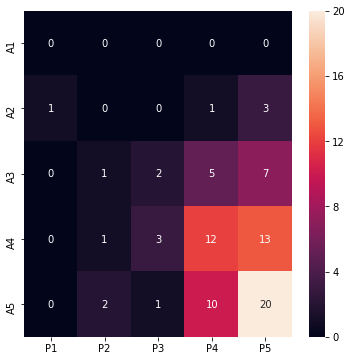

In [62]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

### GaussianProcessClassifier

('Training Accuracy :', 1.0)
('Testing Accuracy :', 0.4268292682926829)
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       1.00      0.07      0.12        15
           4       0.75      0.10      0.18        29
           5       0.43      0.94      0.59        33

   micro avg       0.43      0.43      0.43        82
   macro avg       0.55      0.28      0.22        82
weighted avg       0.62      0.43      0.32        82



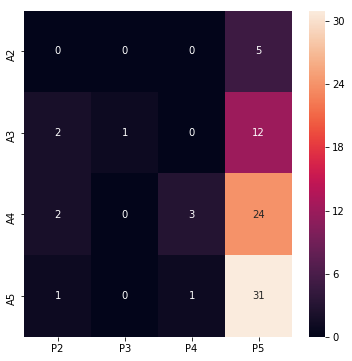

In [63]:
model =  GaussianProcessClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
gp_training_score = round(model.score(x_train, y_train)*100, 2)
gp_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pd.DataFrame(data=cm, columns=['P2','P3','P4','P5'], index=['A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(confusionmatrix ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.4599887766554433)
('GP', 0.4264870931537598)
[array([0.48181818, 0.46296296, 0.43518519]), array([0.40909091, 0.43518519, 0.43518519])]


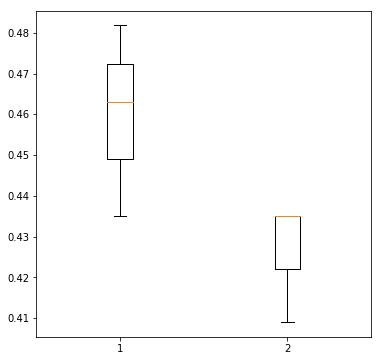

In [64]:
 # making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

              model  Training_accuracy  Testing_accuracy
0     Random forest              97.55             41.46
1  Gaussian process             100.00             42.68


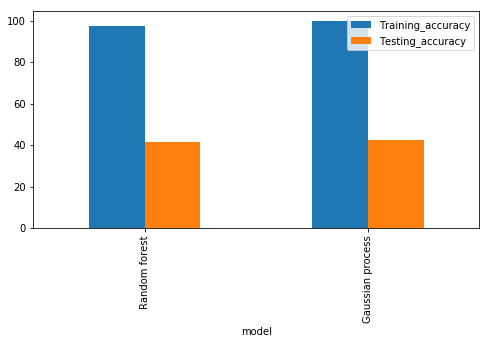

In [65]:
suit3 = { 'model': ['Random forest', 'Gaussian process'], 'Training_accuracy': [rf_training_score , gp_training_score], 'Testing_accuracy': [rf_testing_score, gp_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))